In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 와인의 종류 예측하기

#### 1) 데이터 확인과 실행
#### 2) 모델 업데이트하기
#### 3) 그래프로 표현하기
#### 4) 학습의 자동 중단

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [57]:
# seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [58]:
# 데이터 입력
df_pre = pd.read_csv('/content/gdrive/My Drive/deepLearning/data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [59]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [61]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
# 모델 저장 폴더 설정
MODEL_DIR = '/content/gdrive/My Drive/deepLearning/model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [ ]:
# 모델 저장 조건 설정
modelpath = '/content/gdrive/My Drive/deepLearning/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [63]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0618 - val_accuracy: 0.9897
Epoch 2/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.0674 - val_accuracy: 0.9846
Epoch 3/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0657 - val_accuracy: 0.9846
Epoch 4/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0649 - val_accuracy: 0.9897
Epoch 5/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0673 - val_accuracy: 0.9846
Epoch 6/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0668 - val_accuracy: 0.9846
Epoch 7/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.9885 - val_loss: 0.0636 - val_accuracy: 0.9897
Epoch 8/2000
2/2 [=

In [ ]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장

y_vloss = history.history['val_loss']

In [ ]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장

y_acc = history.history['accuracy']

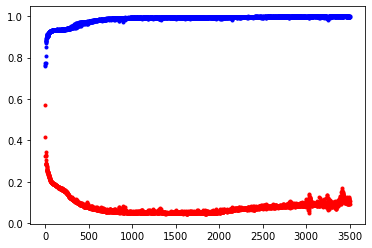

In [ ]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [64]:
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1]))

31/31 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9877

 Accuracy: 0.9877
